In [1]:
import csv
from matplotlib import pyplot as plt

# CIFAR

In [4]:
data = []
with open('./csv_files/cifar_10_pre_drop.csv') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        data.append(row)

In [5]:
# To plot:
# Keep input_p=0
# X axis is pool size
# Y axis is ac c
# Different line for eac

In [6]:
p_0_data = [x for x in data if x["input_p"] == "0"]
p_08_data = [x for x in data if x["input_p"] == "0.8"]

In [7]:
pool_sizes = sorted(list(set([int(x["pool_size"]) for x in p_0_data])))
ms = sorted(list(set([int(x["m"]) for x in p_0_data])))

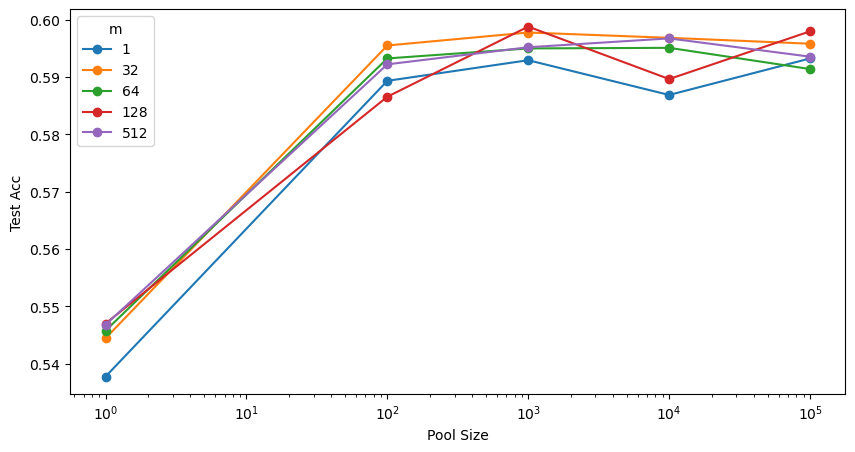

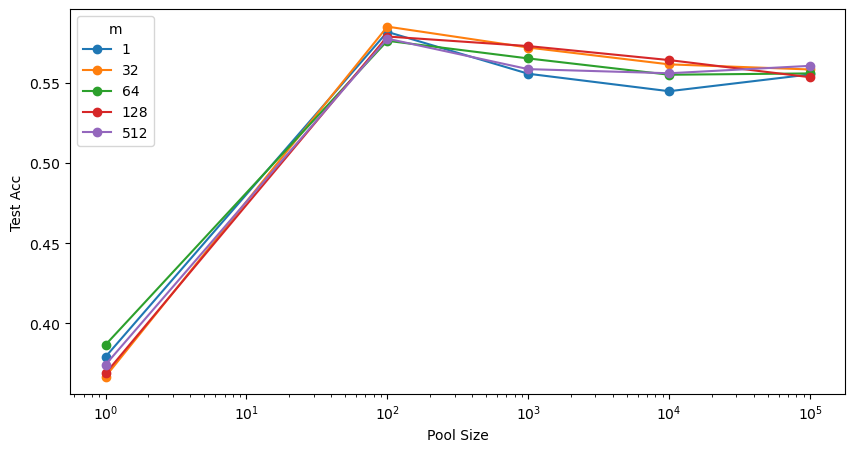

In [8]:
def plot_pool_size_v_test_acc(data, third_var_key="m", third_var_type=int):

    pool_sizes = sorted(list(set([int(x["pool_size"]) for x in data])))
    third_vars = sorted(list(set([third_var_type(x[third_var_key]) for x in data])))
    # PLot x ax pool size, y ax acc, different line for each 
    plt.rcParams["figure.figsize"] = (10,5)

    for third_var in third_vars:
        third_var_const_data = [x for x in data if x[third_var_key] == str(third_var)]

        test_accs = []
        
        for pool_size in pool_sizes:

            data_point = [x for x in third_var_const_data if x["pool_size"] == str(pool_size)][0]
            test_accs.append(float(data_point["test_acc"]))

        plt.plot([int(x) for x in pool_sizes], test_accs, label=third_var, marker = "o")

    plt.xscale("log")
    plt.legend(title=third_var_key)
    plt.xlabel("Pool Size")
    plt.ylabel("Test Acc")
    plt.show()

plot_pool_size_v_test_acc(p_0_data)
plot_pool_size_v_test_acc(p_08_data)

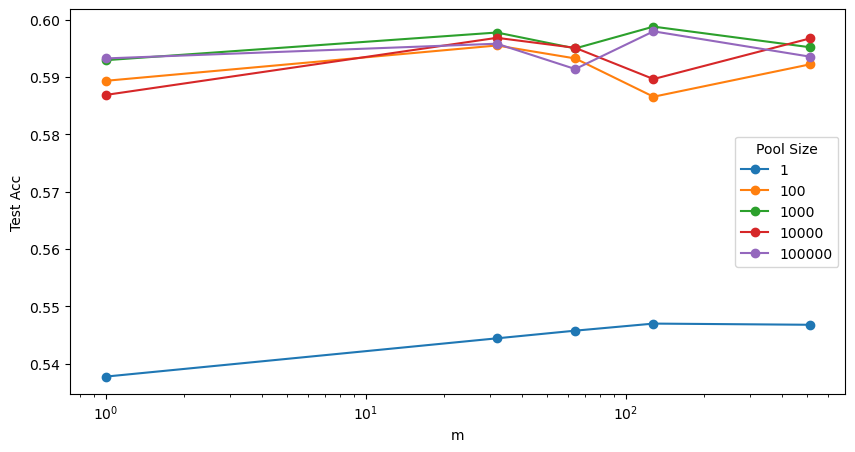

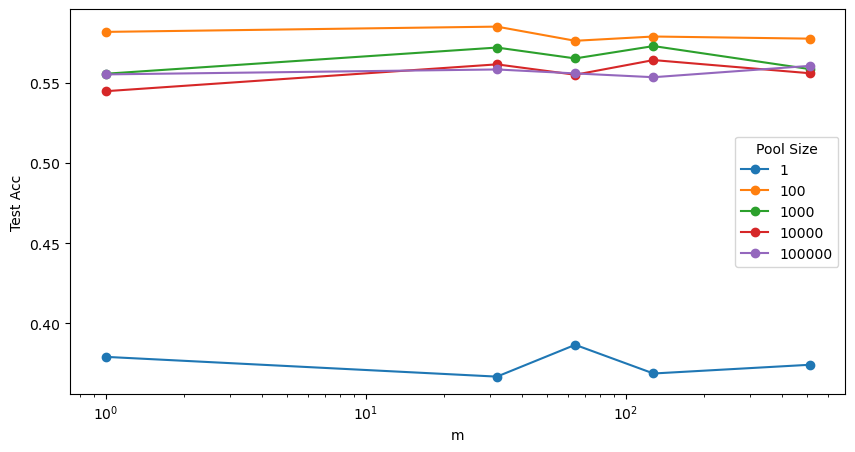

In [9]:
def plot_m_v_test_acc(data):
    # PLot x ax pool size, y ax acc, different line for each 
    plt.rcParams["figure.figsize"] = (10,5)

    for pool_size in pool_sizes:
        pool_const_data = [x for x in data if x["pool_size"] == str(pool_size)]

        test_accs = []
        
        for m in ms:

            data_point = [x for x in pool_const_data if x["m"] == str(m)][0]
            test_accs.append(float(data_point["test_acc"]))

        plt.plot([int(x) for x in ms], test_accs, label=pool_size, marker = "o")

    plt.xscale("log")
    plt.legend(title="Pool Size")
    plt.xlabel("m")
    plt.ylabel("Test Acc")
    plt.show()

plot_m_v_test_acc(p_0_data)
plot_m_v_test_acc(p_08_data)

In [16]:
data = []
with open('./csv_files/cifar_10_pool_sweep_model_sync.csv') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        if row["test_acc"] != "":
            data.append(row)

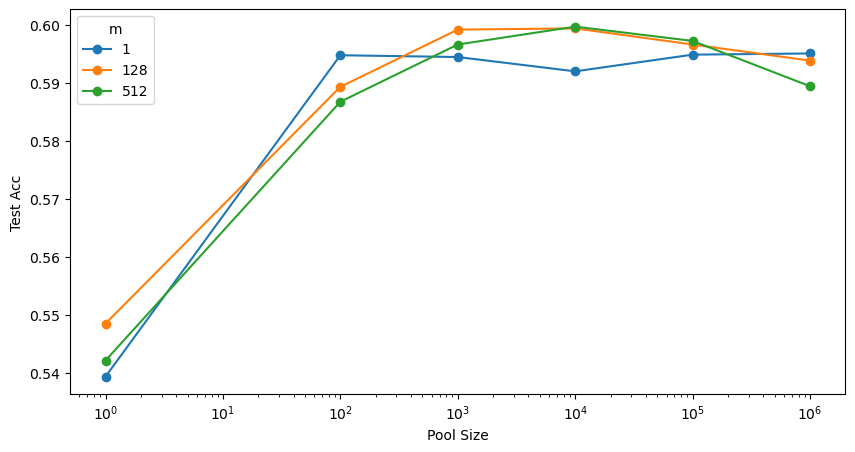

In [18]:
plot_pool_size_v_test_acc(data)

# MNIST 

In [10]:
mnist_data = []
with open('./csv_files/mnist_pooled_sweep.csv') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        mnist_data.append(row)

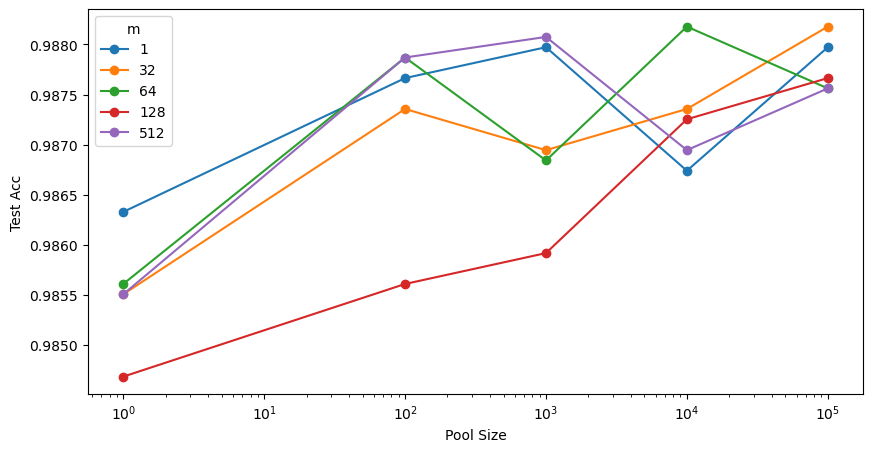

In [62]:
plot_pool_size_v_test_acc(mnist_data)

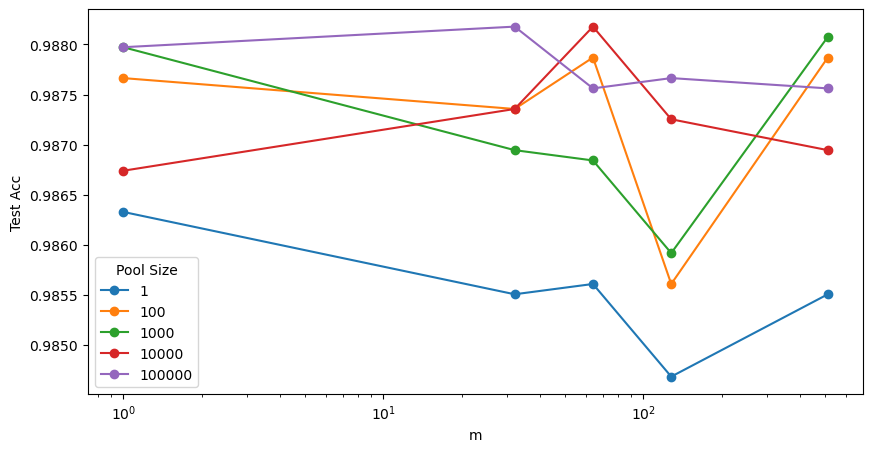

In [63]:
plot_m_v_test_acc(mnist_data)

# CIFAR 10 Varying p

In [11]:
p_data = []
with open('./csv_files/cifar_10_varying_p.csv') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        p_data.append(row)

p_08_data = [x for x in p_data if x["input_p"] == "0.8"]
p_02_data = [x for x in p_data if x["input_p"] == "0.2"]

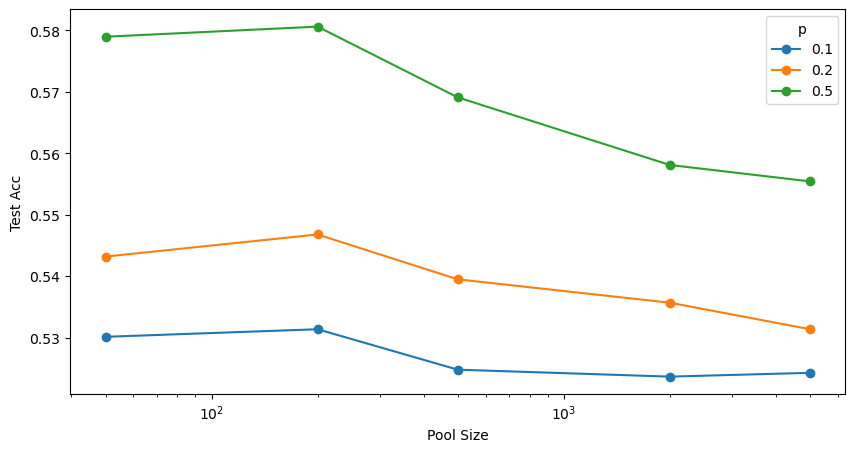

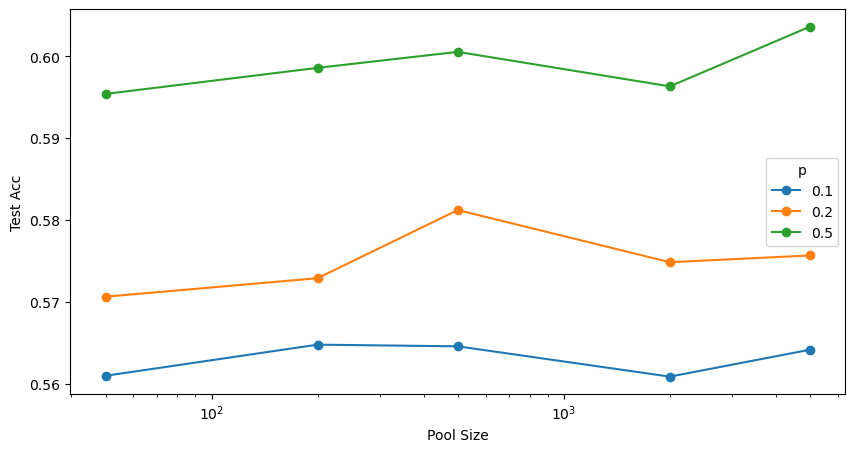

In [12]:
plot_pool_size_v_test_acc(p_08_data, third_var_key="p", third_var_type=float)
plot_pool_size_v_test_acc(p_02_data, third_var_key="p", third_var_type=float)

# Subnet Ensemble

In [19]:
import sys 
sys.path.append("../")
from notebooks.plotting_helpers import get_sweep_dataframe
import csv
import matplotlib.pyplot as plt

In [11]:
DROPOUT_SUBNET_CSV = "./csv_files/dropout_subnet_acc.csv"
POOLED_RANDOM_SUBNET_CSV = "./csv_files/pooled_random_subnet_acc.csv"
POOLED_POOL_SUBNET_CSV = "./csv_files/pooled_pool_subnet_acc.csv"

In [12]:
def read_csv(csv_path):
    data = []
    with open(csv_path) as csvfile:
        csvreader = csv.DictReader(csvfile)
        for idx, row in enumerate(csvreader):
            data.append(row)
    
    return data

In [13]:
dropout_subnets = read_csv(DROPOUT_SUBNET_CSV)

In [29]:
sweep_id = "msekknsh"
ensemble_df = get_sweep_dataframe(sweep_id)

dropout_subnets = [float(x["Test Accuracy"]) for x in read_csv(DROPOUT_SUBNET_CSV)]
pooled_random_subnets = [float(x["Test Accuracy"]) for x in read_csv(POOLED_RANDOM_SUBNET_CSV)]
pooled_pool_subnets = [float(x["Test Accuracy"]) for x in read_csv(POOLED_POOL_SUBNET_CSV)]
ensemble_subnets = list(ensemble_df["test_acc"])

dropout_net = 0.5940583881578947
pool_net = 0.5894325657894737
independent_ensemble = 0.623046875

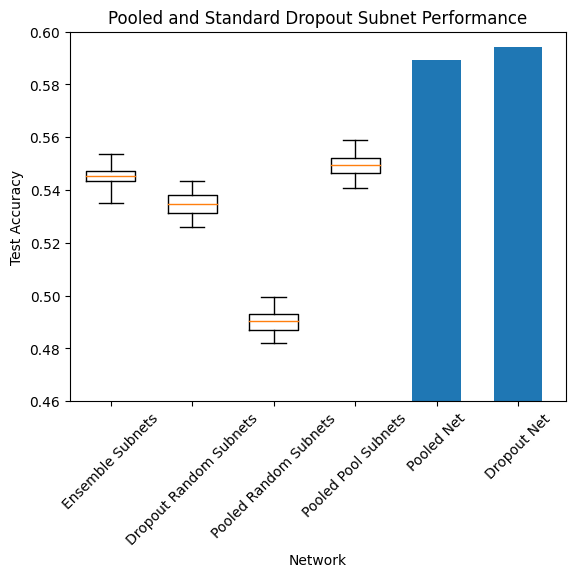

In [34]:
# Create a box plot for each list
plt.boxplot(
    [ensemble_subnets, dropout_subnets, pooled_random_subnets, pooled_pool_subnets],
    positions=[1, 2, 3, 4],
    widths=0.6,
    whis=10
)

# Create bars for d and e
bars = plt.bar([5, 6], [pool_net, dropout_net], width=0.6)

# Set the x-axis tick labels
plt.xticks(
    [1, 2, 3, 4, 5, 6], 
    ['Ensemble Subnets', 'Dropout Random Subnets', 'Pooled Random Subnets', 'Pooled Pool Subnets', 'Pooled Net', 'Dropout Net'],
    rotation=45
)

# Set the title and labels for the axes
plt.ylim(bottom=0.46, top=0.60)
plt.title("Pooled and Standard Dropout Subnet Performance")
plt.xlabel('Network')
plt.ylabel('Test Accuracy')

# Display the box plots
plt.show()

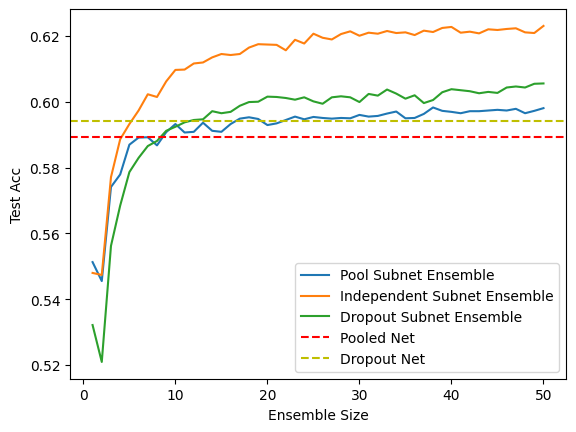

In [40]:
x = list(range(1,51))

pooled_subnet_ensemble_acc = [0.5512952302631579, 0.5455386513157895, 0.5741159539473685, 0.5779194078947368, 0.5869654605263158, 0.589124177631579, 0.5892269736842105, 0.5867598684210527, 0.5907689144736842, 0.5932360197368421, 0.5906661184210527, 0.5908717105263158, 0.5936472039473685, 0.5911800986842105, 0.5908717105263158, 0.5932360197368421, 0.5948807565789473, 0.5952919407894737, 0.5947779605263158, 0.5929276315789473, 0.5934416118421053, 0.594469572368421, 0.5954975328947368, 0.5946751644736842, 0.5953947368421053, 0.5950863486842105, 0.5948807565789473, 0.5950863486842105, 0.594983552631579, 0.5960115131578947, 0.5954975328947368, 0.595703125, 0.596422697368421, 0.5970394736842105, 0.594983552631579, 0.5950863486842105, 0.5963199013157895, 0.5982730263157895, 0.5972450657894737, 0.596936677631579, 0.5965254934210527, 0.5971422697368421, 0.5971422697368421, 0.5973478618421053, 0.5975534539473685, 0.5973478618421053, 0.5978618421052632, 0.5965254934210527, 0.5972450657894737, 0.5980674342105263]
independent_esemble_acc = [0.5480057565789473, 0.5473889802631579, 0.5770970394736842, 0.588610197368421, 0.5932360197368421, 0.5973478618421053, 0.602282072368421, 0.6014597039473685, 0.606188322368421, 0.6096833881578947, 0.6097861842105263, 0.6116365131578947, 0.6119449013157895, 0.6134868421052632, 0.614514802631579, 0.6142064144736842, 0.614514802631579, 0.616467927631579, 0.6174958881578947, 0.6173930921052632, 0.6172902960526315, 0.6156455592105263, 0.6188322368421053, 0.6177014802631579, 0.6206825657894737, 0.6194490131578947, 0.6189350328947368, 0.6205797697368421, 0.6214021381578947, 0.6200657894736842, 0.6209909539473685, 0.6206825657894737, 0.6215049342105263, 0.6208881578947368, 0.62109375, 0.6202713815789473, 0.6216077302631579, 0.6211965460526315, 0.6224300986842105, 0.6227384868421053, 0.6209909539473685, 0.6212993421052632, 0.6207853618421053, 0.6220189144736842, 0.621813322368421, 0.6221217105263158, 0.622327302631579, 0.62109375, 0.6208881578947368, 0.623046875]
dropout_subet_ensemble_acc = [0.5321751644736842, 0.5209703947368421, 0.5562294407894737, 0.5684621710526315, 0.5786389802631579, 0.5829564144736842, 0.5865542763157895, 0.5880962171052632, 0.5911800986842105, 0.5924136513157895, 0.59375, 0.594469572368421, 0.5946751644736842, 0.5971422697368421, 0.5965254934210527, 0.596936677631579, 0.5987870065789473, 0.5999177631578947, 0.6000205592105263, 0.6015625, 0.6014597039473685, 0.6011513157894737, 0.6006373355263158, 0.6013569078947368, 0.6001233552631579, 0.5994037828947368, 0.6013569078947368, 0.6016652960526315, 0.6013569078947368, 0.5999177631578947, 0.6023848684210527, 0.6018708881578947, 0.6037212171052632, 0.6024876644736842, 0.6009457236842105, 0.6019736842105263, 0.599609375, 0.6005345394736842, 0.6028988486842105, 0.6038240131578947, 0.603515625, 0.6032072368421053, 0.6025904605263158, 0.6030016447368421, 0.6026932565789473, 0.6043379934210527, 0.6046463815789473, 0.6043379934210527, 0.60546875, 0.6055715460526315]

plt.plot(x, pooled_subnet_ensemble_acc, label="Pool Subnet Ensemble")
plt.plot(x, independent_esemble_acc, label="Independent Subnet Ensemble")
plt.plot(x, dropout_subet_ensemble_acc, label="Dropout Subnet Ensemble")
plt.xlabel("Ensemble Size")
plt.ylabel("Test Acc")
plt.axhline(pool_net, color='r', xmin=0, xmax=50, linestyle="--", label="Pooled Net")
plt.axhline(dropout_net, color='y', xmin=0, xmax=50, linestyle="--", label="Dropout Net")

plt.legend()
plt.show()